In [ ]:
### THIS is the main notebook where I've worked for the last couple weeks. 
# It contains almost all of my work with the Underwood Scifi/Fantasy dataset, detailed here:https://github.com/tedunderwood/measureperspective
    # Quite recently, I've discovered some serious flaws with this data, namely that it is NOT adjusted by date, which makes it quite difficult to work with for date analysis
        # While this revelation came much later than hoped for, I learned a lot in working with this data that will be applied in the future

# The first section of this dataframe describes the many difficulties in importing my data into Python, and then manipulating it into usable dataframes
    # Then, it details my explorations into predictive modelling and keyword tagging, where I discovered the first issues with the dataset

In [1]:
# First, importing all the non data and building them into dataframes|

In [2]:
import pandas as pd
import codecs
import numpy as np
import glob
import os
import csv
import re

# Setting things up, importing all the necessary Python modules for the code to run!
path1 = 'C:\\Users\\kayde\\Desktop\\ENGL 301\\data_for_chapter1\\sourcefiles\\'

In [4]:
### This code was added significantly later, and was used to backup all my dataframes(in the form of .csv files)
    # This was necessary due to the limitations of my computer, as it frequently crashed, which erased all processing(and the many hours of processing time!)
stanford = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\stanford.csv')
harvard = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\inquirerbasic.csv')

allgenremeta = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\allgenremeta.csv')
final_df = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\final_df.csv')
final_df_tagging = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\final_df_tagging.csv')

final_random_df = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\final_random_df.csv')
final_random_df0 = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\final_random_df0.csv')
final_random_df1 = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\final_random_df1.csv')

final_scifi_df = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\final_scifi_df.csv')
final_scifi_df0 = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\final_scifi_df0.csv')
final_scifi_df1 = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\final_scifi_df1.csv')
final_scifi_df2 = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\final_scifi_df2.csv')

random_fiction = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\random_fiction.csv')
chosen_sf = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\chosen_sf.csv')

seeds_df = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\seeds_df.csv')
# Don't worry about the error, I made a typo earlier(and it takes hours to run this one cell and remove the message!)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (63,108,109,110,176) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,5,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,6,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


NameError: name 'final_random_df2' is not defined

In [7]:
final_random_df2 = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\final_random_df2.csv')

final_df2 = pd.concat([final_scifi_df2, final_random_df2], axis=0)
final_df2 = final_df2.reset_index(drop=True)

final_df2 = final_df2[final_df2['a'].notna()]
final_df2 = final_df2.fillna(0)

In [2]:
### DO STUFF FROM HERE ONWARDS!!!

In [3]:
path2 = 'C:\\Users\\kayde\\Desktop\\measureperspective-master\\data\\'

In [4]:
scifi_meta = pd.read_csv('C:\\Users\\kayde\\Desktop\\measureperspective-master\\rawdata\\chosen_sf.csv')
scifi_meta
# This is the metadata for the scifi data I used, collected by Prof. Ted Underwood for his article "Machine Learning and Human Perspective"
    # In order to work with it, I needed to first import the metadata for all the novels, then "attach" it to the wordcounts for each novel

,docid,recordid,oclc,locnum,includedbc,author,authordate,imprint,inferreddate,firstpub,place,enumcron,subjects,genres,title
0,mdp.39015078562264,1422199,48922409.0,NaN,fuzzymatch,"Paltock, Robert,",NaN,"London;Printed for T. and J. Allman; [etc., et...",1816,1816.0,enk,v.1,"Voyages, Imaginary",NaN,The life & adventures of Peter Wilkins
1,mdp.39015078562256,1422199,48922409.0,NaN,fuzzymatch,"Paltock, Robert,",NaN,"London;Printed for T. and J. Allman; [etc., et...",1816,1816.0,enk,v.2,"Voyages, Imaginary",NaN,The life & adventures of Peter Wilkins
2,mdp.39015004200997,1774603,14770844.0,NaN,fuzzymatch,"Shelley, Mary Wollstonecraft,",NaN,"London;G. Routledge & sons, limited;1891.",1891,1817.0,enk,NaN,NaN,NaN,Frankenstein
3,mdp.39015078544494,1422202,2211760.0,NaN,fuzzymatch,"Paltock, Robert,",NaN,"Boston;Baker & Alexander, R. Colton, printer, ...",1828,1816.0,mau,v.2,"Voyages, Imaginary",NaN,The life and adventures of Peter Wilkins
4,dul1.ark+=13960=t6ww82n4s,8961936,12851342.0,NaN,taggedsf,"Griffith, Mary,",NaN,"Philadelphia;Carey, Lea & Blanchard;1836.",1836,1836.0,pau,NaN,"Science fiction, American",NaN,"Camperdown, or, News from our neighbourhood"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,mdp.39015037377713,1194465,1046832.0,PZ3.S5553Lo16PR6037.H524,oclcid,"Shiel, M. P. (Matthew Phipps),",1865-1947.,New York|Arno Press|1975.,1975,1901.0,nyu,NaN,NaN,Fiction,The lord of the sea.
425,mdp.39015030395175,778810,1054170.0,NaN,oclcid,"Chambers, Robert W. (Robert William),",1865-1933.,New York|Arno Press|1975.,1975,1913.0,nyu,NaN,NaN,Fiction,The gay rebellion.
426,uc1.b3470481,668531,1046822.0,PZ3.C7737Ad20PS3505.O5593,oclcid,"Cook, William Wallace,",1867-1933.,New York|Arno Press|1975.,1975,1906.0,nyu,NaN,NaN,Fiction,"Adrift in the unknown; | or, Queer adventures ..."
427,mdp.39015011259754,393848,10711217.0,PS1303.K4 1984,taggedsf,"Twain, Mark,",1835-1910.,"Hamden, Conn.|Archon Books|1984.",1984,1889.0,ctu,NaN,"Science fiction, American",Fiction|Bibliographies,The science fiction of Mark Twain


In [5]:
import os.path

filtered_list = []

for index, row in scifi_meta.iterrows():
    filepath = path2 + row['docid'] + '.tsv'
    filepath0 = path2 + row['docid'] + '_0.tsv'
    
    if os.path.exists(filepath) == True:
        filtered_list.append(row)
    elif os.path.exists(filepath0) == True:
        filtered_list.append(row)
        
filtered_scifi_df = pd.DataFrame(filtered_list)
len(filtered_list)
# The metadata wasn't perfect, and this code removes any novels that didn't have corresponding wordcounts

425

In [6]:
# Now, this hideous mess of code was developed over the past couple months as a way of reading in .tsv files and turning them into readable dataframes
    # I think this cell alone was worth three days of work on it alone(and I learned a lot in there!)

scifi_dfs_list = []
filepath = ''

for index, row in scifi_meta.iterrows(): # This says that I'm going through the metadata(seen above) and doing this code for 
                                                                                                    # every novel
    filepath = path2 + row['docid'] + '.tsv' # First, I get the location of the wordcount for that novel
    filepath0 = path2 + row['docid'] + '_0.tsv'

    if os.path.exists(filepath) == True: 
        file_df = pd.read_csv(filepath, sep='\t', quoting=csv.QUOTE_NONE, encoding='latin1') # Then, import it into Python
        flipped_df = file_df.transpose() # These bits are rotating and "cleaning up" the data, making it usable
        flipped_df = flipped_df.reset_index(level=0)
        flipped_df.columns = flipped_df.iloc[0]
        flipped_df = flipped_df.dropna(axis='columns')
        flipped_df = flipped_df.drop([0])
        flipped_df = flipped_df.reset_index()
        flipped_df = flipped_df.drop(['feature'], axis=1)
    
        flipped_df.columns = [str(i) for i in flipped_df.columns.values.tolist()] # Then, here I remove words with any non-alphabetical characters
        flipped_df.columns = [re.sub(r'[^A-Za-z]', 'dropme', c) for c in flipped_df.columns.values.tolist()]
        flipped_df = flipped_df[flipped_df.columns.drop(list(flipped_df.filter(regex='dropme')))]
        
        scifi_dfs_list.append(flipped_df)
    elif os.path.exists(filepath0) == True: # Due to some issues in the data, if the first link to the data doesn't work, I try again with another!
        file_df = pd.read_csv(filepath0, sep='\t', quoting=csv.QUOTE_NONE, encoding='latin1')
        flipped_df = file_df.transpose()
        flipped_df = flipped_df.reset_index(level=0)
        flipped_df.columns = flipped_df.iloc[0]
        flipped_df = flipped_df.dropna(axis='columns')
        flipped_df = flipped_df.drop([0])
        flipped_df = flipped_df.reset_index()
        flipped_df = flipped_df.drop(['feature'], axis=1)
    
        flipped_df.columns = [str(i) for i in flipped_df.columns.values.tolist()]
        flipped_df.columns = [re.sub(r'[^A-Za-z]', 'dropme', c) for c in flipped_df.columns.values.tolist()]
        flipped_df = flipped_df[flipped_df.columns.drop(list(flipped_df.filter(regex='dropme')))]
    
        scifi_dfs_list.append(flipped_df)
scifi_dfs_list

[   index   furlong hardships ruminating  already   corners    warped  \
 0      1  0.000023  0.000047   0.000023  0.00007  0.000023  0.000023   
 
   direction  applying consuming  ... subscribing dangerous  exercise  \
 0  0.000094  0.000047  0.000023  ...    0.000023  0.000023  0.000047   
 
       leapt    pushed distemper    comply     tions     tbera     ride  
 0  0.000047  0.000047  0.000023  0.000023  0.000023  0.000023  0.00007  
 
 [1 rows x 4430 columns],
    index     order principal      cape      gaiu   already      teem  \
 0      1  0.000382  0.000024  0.000024  0.000024  0.000143  0.000024   
 
   proposals direction    invent  ...       his    verity    freely  entering  \
 0  0.000024  0.000048  0.000048  ...  0.005923  0.000024  0.000024  0.000096   
 
     prevail    circle    pushed  insomuch    comply      feed  
 0  0.000072  0.000072  0.000024  0.000024  0.000024  0.000119  
 
 [1 rows x 3897 columns],
    index   aspires principal   already direction    smile

In [7]:
final_scifi_df0 = pd.concat(scifi_dfs_list, axis=0, ignore_index=True)
final_scifi_df0
# Now, I put all the word counts together for each novel, et voila!
    # This shows the percentage of each word that appears in every novel - how many times that word appears by percentage

,index,furlong,hardships,ruminating,already,corners,warped,direction,applying,consuming,...,potztausend,couldna,byzantean,langur,gruben,halfsmoked,deeficulties,perniciously,wepins,sujet
0,1,0.000023,0.000047,0.000023,0.00007,0.000023,0.000023,0.000094,0.000047,0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,0.000143,NaN,NaN,0.000048,0.000048,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,0.000393,NaN,NaN,0.000022,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,0.000018,0.000091,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,0.000332,0.000026,NaN,0.000077,0.000026,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1,NaN,NaN,NaN,0.000204,0.000031,NaN,0.000079,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,0.000017,NaN,NaN,NaN,0.000252,0.000084,NaN,0.000202,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,1,NaN,NaN,NaN,0.000403,0.000031,NaN,0.000217,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,0.000013,NaN,NaN,NaN,0.000092,0.000026,NaN,0.000066,0.000013,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# This and the next cell are turning that percentage into a count of how many times the words appear - whole numbers now!
minvalue_series = final_scifi_df0.min(axis = 1)
final_scifi_df0['Minvalue'] = minvalue_series

In [14]:
final_scifi_df0.iloc[:,:-1] = final_scifi_df0.apply(lambda r: r/r['Minvalue'] if r['Minvalue'] != 0 else r['Minvalue'],axis=1).round(1)


In [15]:
final_scifi_df = pd.concat([scifi_meta, final_scifi_df0], axis=1)
# Putting it all together - attaching the metadata to the wordcounts

In [16]:
final_scifi_df
# Yay it works!

,docid,recordid,oclc,locnum,includedbc,author,authordate,imprint,inferreddate,firstpub,...,couldna,byzantean,langur,gruben,halfsmoked,deeficulties,perniciously,wepins,sujet,Minvalue
0,mdp.39015078562264,1422199,48922409.0,NaN,fuzzymatch,"Paltock, Robert,",NaN,"London;Printed for T. and J. Allman; [etc., et...",1816,1816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000023
1,mdp.39015078562256,1422199,48922409.0,NaN,fuzzymatch,"Paltock, Robert,",NaN,"London;Printed for T. and J. Allman; [etc., et...",1816,1816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000024
2,mdp.39015004200997,1774603,14770844.0,NaN,fuzzymatch,"Shelley, Mary Wollstonecraft,",NaN,"London;G. Routledge & sons, limited;1891.",1891,1817.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000022
3,mdp.39015078544494,1422202,2211760.0,NaN,fuzzymatch,"Paltock, Robert,",NaN,"Boston;Baker & Alexander, R. Colton, printer, ...",1828,1816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000018
4,dul1.ark+=13960=t6ww82n4s,8961936,12851342.0,NaN,taggedsf,"Griffith, Mary,",NaN,"Philadelphia;Carey, Lea & Blanchard;1836.",1836,1836.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,mdp.39015037377713,1194465,1046832.0,PZ3.S5553Lo16PR6037.H524,oclcid,"Shiel, M. P. (Matthew Phipps),",1865-1947.,New York|Arno Press|1975.,1975,1901.0,...,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000019
425,mdp.39015030395175,778810,1054170.0,NaN,oclcid,"Chambers, Robert W. (Robert William),",1865-1933.,New York|Arno Press|1975.,1975,1913.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,uc1.b3470481,668531,1046822.0,PZ3.C7737Ad20PS3505.O5593,oclcid,"Cook, William Wallace,",1867-1933.,New York|Arno Press|1975.,1975,1906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,mdp.39015011259754,393848,10711217.0,PS1303.K4 1984,taggedsf,"Twain, Mark,",1835-1910.,"Hamden, Conn.|Archon Books|1984.",1984,1889.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
final_scifi_df['and']

0      1272.0
1      1191.0
2      1457.0
3      1532.0
4       832.0
        ...  
424    1251.0
425       NaN
426       NaN
427       NaN
428       NaN
Name: and, Length: 429, dtype: float64

In [18]:
random_meta = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\random_fiction.csv')
random_meta
# This next bit repeats everything I did above, except for the corpus of randomly selected novels
    # These will be used as comparisons against the sci-fi books, to compare them to the "normal"
        # There are flaws in this data, mainly that it is not balanced across the range of dates, but I didn't realize that till much later

,docid,recordid,oclc,locnum,author,authordate,imprint,inferreddate,place,enumcron,subjects,genres,title
0,njp.32101041607258,8890022,13343910.0,NaN,"Brown, Thomas,",NaN,London;The author;1818.,1818,enk,v.3,NaN,NaN,"Brighton; or, The Steyne"
1,uiuo.ark+=13960=t74t6zh4r,8721164,6154419.0,NaN,"Defoe, Daniel,",NaN,Edinburgh;J. Ballantyne;1810.,1810,stk,v.2,NaN,NaN,Life of Colonel Jack
2,hvd.hxg8pp,9708635,13562766.0,NaN,NaN,NaN,London;Printed by W. Flint for R. Evans;1815.,1815,enk,NaN,Allegories,NaN,"The female pilgrim, or, The travels of Hephzibah"
3,hvd.32044009637083,9710338,40011848.0,NaN,"Fowler, George.",NaN,Baltimore;Printed and sold by A. Miltenberger;...,1813,mdu,NaN,"Voyages, Imaginary;Moon",NaN,"A flight to the moon, or, The vision of Randal..."
4,uiuo.ark+=13960=t5s762w4d,8718094,77329275.0,NaN,"Davenport, Selina.",NaN,London;Printed at the Minerva Press for A. K. ...,1818,enk,v.2,NaN,NaN,An angel's form and a devil's heart
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,mdp.39015066896872,5397561,69022319.0,NaN,"Rankin, Ian.",NaN,London|Orion|2006.,2006,enk,NaN,"Rebus, Inspector (Fictitious character)|Fictio...",Fiction|Detective and mystery stories,The naming of the dead / | $c: Ian Rankin.
503,mdp.39015084104259,6877083,317674209.0,PR6105.V345W66 2009,"Evans, Diana,",1971-,London|Chatto & Windus|2009.,2009,enk,NaN,Fiction|Family secrets|Dancers,Fiction,The wonder / | $c: Diana Evans.
504,mdp.39015053381003,4197783,46671137.0,PS3560.E48M66 2001,"Jenkins, Dan.",NaN,New York|Doubleday|c2001.,2001,nyu,NaN,NaN,Fiction,The money-whipped steer-job three-jack give-up...
505,uc1.32106018449071,5235310,62282541.0,PS3569.H3383L58 2006,"Shapiro, Anna",NaN,New York|Soho Press|c2006,2006,nyu,NaN,Teenage girls|Fiction|Identity (psychology),Fiction,Living on air : | a novel / | $c: Anna Shapiro


In [19]:
import os.path

filtered_random_list = []

for index, row in random_meta.iterrows():
    filepath = path2 + row['docid'] + '.tsv'
    filepath0 = path2 + row['docid'] + '_0.tsv'
    filepath1 = path2 + row['docid'] + '_1.tsv' 
    
    if os.path.exists(filepath) == True:
        filtered_random_list.append(row)
    elif os.path.exists(filepath0) == True:
        filtered_random_list.append(row)
        
filtered_random_df = pd.DataFrame(filtered_random_list)
len(filtered_random_list)

467

In [20]:
filtered_random_df

,docid,recordid,oclc,locnum,author,authordate,imprint,inferreddate,place,enumcron,subjects,genres,title
0,njp.32101041607258,8890022,13343910.0,NaN,"Brown, Thomas,",NaN,London;The author;1818.,1818,enk,v.3,NaN,NaN,"Brighton; or, The Steyne"
2,hvd.hxg8pp,9708635,13562766.0,NaN,NaN,NaN,London;Printed by W. Flint for R. Evans;1815.,1815,enk,NaN,Allegories,NaN,"The female pilgrim, or, The travels of Hephzibah"
3,hvd.32044009637083,9710338,40011848.0,NaN,"Fowler, George.",NaN,Baltimore;Printed and sold by A. Miltenberger;...,1813,mdu,NaN,"Voyages, Imaginary;Moon",NaN,"A flight to the moon, or, The vision of Randal..."
4,uiuo.ark+=13960=t5s762w4d,8718094,77329275.0,NaN,"Davenport, Selina.",NaN,London;Printed at the Minerva Press for A. K. ...,1818,enk,v.2,NaN,NaN,An angel's form and a devil's heart
5,uiuo.ark+=13960=t5z61419r,8722068,41221190.0,NaN,NaN,NaN,London;Gale;1813.,1813,enk,v.1,NaN,NaN,The ordeal;
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,mdp.39015066896872,5397561,69022319.0,NaN,"Rankin, Ian.",NaN,London|Orion|2006.,2006,enk,NaN,"Rebus, Inspector (Fictitious character)|Fictio...",Fiction|Detective and mystery stories,The naming of the dead / | $c: Ian Rankin.
503,mdp.39015084104259,6877083,317674209.0,PR6105.V345W66 2009,"Evans, Diana,",1971-,London|Chatto & Windus|2009.,2009,enk,NaN,Fiction|Family secrets|Dancers,Fiction,The wonder / | $c: Diana Evans.
504,mdp.39015053381003,4197783,46671137.0,PS3560.E48M66 2001,"Jenkins, Dan.",NaN,New York|Doubleday|c2001.,2001,nyu,NaN,NaN,Fiction,The money-whipped steer-job three-jack give-up...
505,uc1.32106018449071,5235310,62282541.0,PS3569.H3383L58 2006,"Shapiro, Anna",NaN,New York|Soho Press|c2006,2006,nyu,NaN,Teenage girls|Fiction|Identity (psychology),Fiction,Living on air : | a novel / | $c: Anna Shapiro


In [21]:
random_dfs_list = []
filepath = ''

for index, row in random_meta.iterrows():
    filepath = path2 + row['docid'] + '.tsv'
    filepath0 = path2 + row['docid'] + '_0.tsv'

    if os.path.exists(filepath) == True:
        file_df = pd.read_csv(filepath, sep='\t', quoting=csv.QUOTE_NONE, encoding='latin1')
        flipped_df = file_df.transpose()
        flipped_df = flipped_df.reset_index(level=0)
        flipped_df.columns = flipped_df.iloc[0]
        flipped_df = flipped_df.dropna(axis='columns')
        flipped_df = flipped_df.drop([0])
        flipped_df = flipped_df.reset_index()
        flipped_df = flipped_df.drop(['feature'], axis=1)
    
        flipped_df.columns = [str(i) for i in flipped_df.columns.values.tolist()]
        flipped_df.columns = [re.sub(r'[^A-Za-z]', 'dropme', c) for c in flipped_df.columns.values.tolist()]
        flipped_df = flipped_df[flipped_df.columns.drop(list(flipped_df.filter(regex='dropme')))]
        
        random_dfs_list.append(flipped_df)
    elif os.path.exists(filepath0) == True:
        file_df = pd.read_csv(filepath0, sep='\t', quoting=csv.QUOTE_NONE, encoding='latin1')
        flipped_df = file_df.transpose()
        flipped_df = flipped_df.reset_index(level=0)
        flipped_df.columns = flipped_df.iloc[0]
        flipped_df = flipped_df.dropna(axis='columns')
        flipped_df = flipped_df.drop([0])
        flipped_df = flipped_df.reset_index()
        flipped_df = flipped_df.drop(['feature'], axis=1)
    
        flipped_df.columns = [str(i) for i in flipped_df.columns.values.tolist()]
        flipped_df.columns = [re.sub(r'[^A-Za-z]', 'dropme', c) for c in flipped_df.columns.values.tolist()]
        flipped_df = flipped_df[flipped_df.columns.drop(list(flipped_df.filter(regex='dropme')))]
    
        random_dfs_list.append(flipped_df)
random_dfs_list

[   index    notes  corners proposals   smiles  derives cheerfully      this  \
 0      1  0.00003  0.00003  0.000091  0.00003  0.00003    0.00003  0.004877   
 
    succeed furthermore  ...     comme   honours       ten       his    reform  \
 0  0.00003     0.00003  ...  0.000061  0.000061  0.000427  0.012619  0.000244   
 
      cheap    circle sinivating    tions      feed  
 0  0.00003  0.000122    0.00003  0.00003  0.000061  
 
 [1 rows x 5116 columns],
    index  complain   morning     grain principal ruminating  already  \
 0      1  0.000017  0.000412  0.000017  0.000034   0.000017  0.00012   
 
   direction   informs communicating  ...   engaged       his correspondents  \
 0  0.000017  0.000034      0.000017  ...  0.000034  0.005908       0.000017   
 
       cheap  entering     leapt     dealt  quarters       shy   thought  
 0  0.000017  0.000034  0.000017  0.000034  0.000069  0.000069  0.001151  
 
 [1 rows x 4239 columns],
    index     cover      none    seemed fortunat

In [22]:
final_random_df0 = pd.concat(random_dfs_list, axis=0, ignore_index=True)
final_random_df0

,index,notes,corners,proposals,smiles,derives,cheerfully,this,succeed,furthermore,...,cupreous,carnivores,lotharios,antichrists,nolasco,toughmindedtondo,bladesharp,maravedis,offaroles,silay
0,1,0.00003,0.00003,0.000091,0.00003,0.00003,0.00003,0.004877,0.00003,0.00003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.000017,NaN,NaN,NaN,NaN,0.000103,0.007986,0.000034,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.000075,NaN,NaN,0.000112,NaN,0.000019,0.002828,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,0.000021,0.000042,0.000106,NaN,0.000085,0.000021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,0.000042,0.000063,NaN,0.000021,0.003455,0.000042,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0.000018,0.000158,NaN,NaN,0.000035,NaN,NaN,0.002131,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,1,0.000016,0.000063,0.000016,NaN,NaN,NaN,0.003736,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,1,0.000044,NaN,NaN,NaN,NaN,NaN,0.002731,NaN,0.000022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,1,0.000024,0.000071,NaN,0.000047,NaN,0.000024,0.003501,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
minvalue_random_series = final_random_df0.min(axis = 1)
final_random_df0['Minvalue'] = minvalue_random_series

In [24]:
final_random_df0.iloc[:,:-1] = final_random_df0.apply(lambda r: r/r['Minvalue'] if r['Minvalue'] != 0 else r['Minvalue'],axis=1).round(1)


In [25]:
final_random_df = pd.concat([random_meta, final_random_df0], axis=1)


In [31]:
final_random_df['and']

0      1115.0
1      1626.0
2      1687.0
3      1069.0
4      1325.0
        ...  
502       NaN
503       NaN
504       NaN
505       NaN
506       NaN
Name: and, Length: 507, dtype: float64

In [39]:
# THESE next four cells are just me backing up the data
    # This was added after my computer crashed and I had to run everything again for another 16-ish hours
final_random_df.to_csv('final_random_df.csv', encoding='utf-8', index=False)


In [40]:
final_scifi_df.to_csv('final_scifi_df.csv', encoding='utf-8', index=False)


In [79]:
final_random_df0.to_csv('final_random_df0.csv', encoding='utf-8', index=False)


In [80]:
final_scifi_df0.to_csv('final_scifi_df0.csv', encoding='utf-8', index=False)


In [109]:
final_random_df0_5summed = final_random_df0[final_random_df0.columns[final_random_df0.sum()>5]]
final_random_df0_5summed = final_random_df0_5summed.drop(columns=['index'])
final_random_df0_5summed
# Here I'm cutting down the wordcounts to only include words that appear 5 or more times across all 500-ish novels
    # This improves processing speed, and gets rid of typos/novel-specific words that don't help much
    # I would ignore this work later, as it introduced a margin of error, but after seeing my computer break down again and again, was really trying anything to improve processing

,notes,corners,proposals,smiles,derives,cheerfully,this,succeed,furthermore,mirth,...,lpga,immerman,pughs,weesie,asuang,mojica,bautista,isio,inocencio,nolasco
0,1.0,1.0,3.0,1.0,1.0,1.0,160.0,1.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,6.0,465.0,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,6.0,NaN,1.0,151.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,2.0,5.0,NaN,4.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2.0,3.0,NaN,1.0,164.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,9.0,NaN,NaN,2.0,NaN,NaN,121.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,1.0,4.0,1.0,NaN,NaN,NaN,238.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,2.0,NaN,NaN,NaN,NaN,NaN,123.0,NaN,1.0,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,1.0,3.0,NaN,2.0,NaN,1.0,148.0,NaN,NaN,NaN,...,NaN,9.0,9.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Here I'm cutting down the metadata to only the necessary information and cleaning it up
scifi_meta_necessary = scifi_meta[['docid', 'firstpub', 'title']]
random_meta_necessary = random_meta[['docid', 'inferreddate', 'title']]

scifi_meta_necessary.rename(columns = {'docid':'Docid', 'firstpub':'Date', 'title':'Title'}, inplace = True)
random_meta_necessary.rename(columns = {'docid':'Docid', 'inferreddate':'Date', 'title':'Title'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [160]:
final_random_df0_indexfixed = final_random_df0.drop(columns=['index'])
final_scifi_df0_indexfixed = final_scifi_df0.drop(columns=['index'])

final_random_df0_indexfixed = final_random_df0_indexfixed[final_random_df0_indexfixed.columns[final_random_df0_indexfixed.sum()>2]]
final_scifi_df0_indexfixed = final_scifi_df0_indexfixed[final_scifi_df0_indexfixed.columns[final_scifi_df0_indexfixed.sum()>2]]

final_random_df0_indexfixed = final_random_df0_indexfixed.reindex(sorted(final_random_df0_indexfixed.columns), axis=1)
final_scifi_df0_indexfixed = final_scifi_df0_indexfixed.reindex(sorted(final_scifi_df0_indexfixed.columns), axis=1)

In [161]:
final_random_df1 = pd.concat([random_meta_necessary, final_random_df0_indexfixed], axis=1)
final_scifi_df1 = pd.concat([scifi_meta_necessary, final_scifi_df0_indexfixed], axis=1)

In [171]:
final_random_df1.to_csv('final_random_df1.csv', encoding='utf-8', index=False)
final_scifi_df1.to_csv('final_scifi_df1.csv', encoding='utf-8', index=False)


In [174]:
final_random_df1.insert(0, 'Genre', '1')
final_scifi_df1.insert(0, 'Genre', '0')

ValueError: cannot insert Genre, already exists

In [180]:
# Finally, I get this: dataframes that are clean, usable, and not too massive
final_random_df1

,Genre,Docid,Date,Title,a,aa,aaa,aaaah,aaah,aachen,...,zvi,zwar,zwei,zweig,zwolle,zworykin,zyama,zygielbojm,zygote,zyklon
0,1,njp.32101041607258,1818,"Brighton; or, The Steyne",763.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,uiuo.ark+=13960=t74t6zh4r,1810,Life of Colonel Jack,784.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,hvd.hxg8pp,1815,"The female pilgrim, or, The travels of Hephzibah",743.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,hvd.32044009637083,1813,"A flight to the moon, or, The vision of Randal...",611.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,uiuo.ark+=13960=t5s762w4d,1818,An angel's form and a devil's heart,722.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1,mdp.39015066896872,2006,The naming of the dead / | $c: Ian Rankin.,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,1,mdp.39015084104259,2009,The wonder / | $c: Diana Evans.,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,1,mdp.39015053381003,2001,The money-whipped steer-job three-jack give-up...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,1,uc1.32106018449071,2006,Living on air : | a novel / | $c: Anna Shapiro,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
final_df = pd.concat([final_scifi_df1, final_random_df1], axis=0)
final_df = final_df.reset_index(drop=True)

In [205]:
# Cleaning it up!
final_df = final_df[final_df['a'].notna()]
final_df = final_df.fillna(0)
final_df

,Genre,Docid,Date,Title,a,aa,aaa,aaaah,aaah,aaanthor,...,zuyder,zvani,zvi,zwar,zweig,zwolle,zworykin,zyama,zygielbojm,zyklon
0,0,mdp.39015078562264,1816.0,The life & adventures of Peter Wilkins,790.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,mdp.39015078562256,1816.0,The life & adventures of Peter Wilkins,574.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,mdp.39015004200997,1817.0,Frankenstein,765.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,mdp.39015078544494,1816.0,The life and adventures of Peter Wilkins,1034.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,dul1.ark+=13960=t6ww82n4s,1836.0,"Camperdown, or, News from our neighbourhood",616.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,1,mdp.39015066895882,2006.0,Miami noir / | $c: edited by Les Standiford.,1140.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
892,1,mdp.39015052006742,2000.0,Something barely remembered / | $c: Susan Visv...,1452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
893,1,uc1.32106017248482,2003.0,Further up in the air / | $c: Will Self ... [e...,1032.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894,1,mdp.39015066821045,2006.0,God's little soldier / | $c: Kiran Nagarkar.,883.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
### Now that all the dataframes are mostly cleaned up, it's time for actual analysis!!!

In [ ]:
# First, I used a machine learning model(called Logistic Regression) that is trained on the random corpus and the scifi corpus
    # Then, it tries to predict whether other(untrained-upon) novels are sci-fi or not
    
    # There are alot of notes to myself here, as things can get a bit hairy!

In [476]:
X = final_df.iloc[:, 4:].values    # corresponds to where feature columns begin, (C), just want the DTM, know where it starts!
Y = final_df.iloc[:, 0].values # corresponds to where class values are located
                                    # (C) This is where the class(journal names) values are located
X1 = X.astype(np.float) # X is all the words
Y1 = Y.astype(np.float) 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3)

C:\Users\kayde\AppData\Local\Temp/ipykernel_1540/2167554411.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X1 = X.astype(np.float) # X is all the words
C:\Users\kayde\AppData\Local\Temp/ipykernel_1540/2167554411.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y1 = Y.astype(np.float)


In [209]:
import time

# ALWAYS USE THIS!!!
t0 = time.time()

#CODEHERE

t1 = time.time()
total = t1-t0
total

0.0

In [210]:
from sklearn.linear_model import LogisticRegression

t0 = time.time()

model2 = LogisticRegression() # Remember l1 is lasso (the original: penalty='l1',C=1)
                                        # (C) Lookup the C value, wait this doesn't work
model2.fit(X_train, y_train)

t1 = time.time()
total = t1-t0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [211]:
predicted = model2.predict(X_test)
# generate class probabilities
probs = model2.predict_proba(X_test)

In [212]:
### FINALLY I got this! What this says, is that for one runthrough of the model, it was able to predict scifi novels
    # from general fiction with an accuracy rate of 88 percent!
# This is where I got very excited!
    # Of course, all this was done already by Prof. Underwood, I wasn't exactly inventing the wheel here, 
    # but it took a long while to get to this point and it was very exciting
        # Now, I could start my own experiments and go beyond the previous research!

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Evaluation metrics; accuracy + ROC
print(accuracy_score(y_test, predicted))

# Confusion matrix, F-1 score
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

0.8694029850746269
[[104  21]
 [ 14 129]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86       125
         1.0       0.86      0.90      0.88       143

    accuracy                           0.87       268
   macro avg       0.87      0.87      0.87       268
weighted avg       0.87      0.87      0.87       268



In [481]:
from sklearn.model_selection import cross_val_score
# (C) Here, we're running the model 10 times and taking the average, testing the model accuracy! (85% - pretty good!)
scores=cross_val_score(LogisticRegression(penalty='l1', solver='liblinear'), X1, Y1, scoring='accuracy', cv=10) # f1_weighted
print(scores)
print(scores.mean())

[0.75555556 0.78888889 0.88764045 0.92134831 0.8988764  0.88764045
 0.86516854 0.87640449 0.86516854 0.84269663]
0.8589388264669162


In [482]:
# This is really, really cool, and what I intend to further study for the research project
    # Basically, the model is identifying what specific words are tied to scifi as opposed to random fiction, and vice versa
    # Some are novel specific(and would be weeded out through mutliple trials) like "barsac" or "ransome", but others begin to point to other trends

    
    
# MY PLAN is to further develop this research by analyzing sci-fi texts across time with a superior dataset, 
    # then analyzing the TYPES of words that fundamentally characterize science fiction as a genre
        # What are those key terms? Importantly, how do they relate to other conceptualizations of science fiction?
        
# For example: how do characterizations of space become more/less important across the 20th century? How does the usage of "speculation words" change over time? How does that compare to other fiction?
    # This can be combined with (partial)tokenizing analysis using the Harvard General Inquirer Semantic Catagories.
        # Using that, I can track the usages of certain parts of speach/types of words across sci fi and count what it specifically uses the most, THEN compare that to broader fiction


#clf = LogisticRegression(penalty='l1', C=0.1)
clf = LogisticRegression(penalty='l1', solver='liblinear') # (C) This fixes things - maybe? everything is different
clf.fit(X_train, y_train)
    
feature_names = final_df.columns[4:].values     
class_labels = final_df['Genre'].unique()

# (C) The model gives you the coefficient rates(for the equation) for each word, and then we take the greatest/least for each journal
top20 = np.argsort(np.exp(clf.coef_))[0][-10:]
print("Top 10 features associated with second class (Random)\n")
for el in zip(feature_names[top20], np.exp(clf.coef_)[0][top20]):
    print(el)

print("\n")
print("Top 10 features associated with first class (SciFi)\n")
bottom20 = np.argsort(np.exp(clf.coef_))[0][:10]
for el in zip(feature_names[bottom20], np.exp(clf.coef_)[0][bottom20]):
    print(el)

Top 10 features associated with second class (Random)

('friends', 1.075409167489473)
('say', 1.0763032928679848)
('boat', 1.0763443715870389)
('wife', 1.0764847314202208)
('ransome', 1.0798853016533554)
('village', 1.0877434355071365)
('hard', 1.0879239499077256)
('church', 1.0983966494135349)
('go', 1.1018547356860782)
('always', 1.1453675154543055)


Top 10 features associated with first class (SciFi)

('science', 0.8339229809255428)
('barsac', 0.8597623577579988)
('marigold', 0.8716403888150887)
('years', 0.8959297425153627)
('planet', 0.9162116257171877)
('liana', 0.9261760548145119)
('earth', 0.9274832576460119)
('twenty', 0.9300602699292648)
('fiction', 0.9319593428403892)
('few', 0.934871497732901)


In [480]:
final_df[['barsac']].sum()

barsac    129.0
dtype: float64

In [472]:
# personal notes:
# YAYYYYYY!!!!! IT WORKS!!!!

# AND IT DOESN"T TAKE A RIDICULOUS AMOUNT OF TIME!!!

# Now, to get things sorted to try tokenizing

In [ ]:
# Here's where I temporarily shifted directions, as I realized that I needed to test the possibilities of doing semantic analysis
    # Could I even get it to work?

In [256]:
just_data = final_df.drop(['Genre', 'Docid', 'Date', 'Title'], axis=1)
just_data_int = just_data.astype(int)
# Creating new, edited dataframes to work with

In [257]:
row_list = []

for index, rows in just_data_int.iterrows():
    # Create list for the current row
    my_list =[rows]
      
    # append the list to the final list
    row_list.append(my_list)

In [258]:
row_list = just_data_int.values.tolist()
words_list = list(just_data_int.columns)


In [286]:
list_of_list_of_words = []
for book in row_list:
    i = 0
    temp_list = []
    for word in book:
        total_words = word*(words_list[i],)
        temp_list.append(total_words)
        i = i+1
        
        
    flat_list = [item for sublist in temp_list for item in sublist]
    list_of_list_of_words.append(flat_list)


In [288]:
len(list_of_list_of_words)

892

In [301]:
final_df_tagging = final_df[['Genre', 'Docid', 'Date', 'Title']].copy()

In [ ]:
# I'm summarizing a bit, but here I'm creating the "text" of the novel, all the words the book contains in alphabetical order
    # Then, I can analyze that text for types of words
    
# I'm starting with using a differnt way of categorizing words, "hard" and "soft" seeds described here:
 # https://chicago.universitypressscholarship.com/view/10.7208/chicago/9780226612973.001.0001/upso-9780226612669-chapter-001
# and originally here: https://litlab.stanford.edu/LiteraryLabPamphlet4.pdf

# These are easier to start with, and then I can move to the significantly more complex Harvard tagging

In [4]:
# For comparison:
stanford = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\stanford.csv')
harvard = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\inquirerbasic.csv')

stanford

,word,class
0,see,hard
1,come,hard
2,go,hard
3,came,hard
4,look,hard
...,...,...
828,bragging,abstract
829,indecency,abstract
830,superciliousness,abstract
831,immodest,abstract


In [5]:
# and harvard...
harvard

,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined
0,A,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DET ART,| article: Indefinite singular article--some o...
1,ABANDON,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
2,ABANDONMENT,H4,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
3,ABATE,H4Lvd,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
4,ABATEMENT,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11783,ZENITH,H4,Positiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
11784,ZERO,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DET,|
11785,ZEST,H4,Positiv,NaN,NaN,NaN,NaN,NaN,Strong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
11786,ZINC,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|


In [302]:
final_df_tagging.insert(4, 'Text', list_of_list_of_words)
final_df_tagging['Length'] = final_df_tagging['Text'].apply(len)
final_df_tagging

,Genre,Docid,Date,Title,Text,Length
0,0,mdp.39015078562264,1816.0,The life & adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",33665
1,0,mdp.39015078562256,1816.0,The life & adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",32009
2,0,mdp.39015004200997,1817.0,Frankenstein,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",38900
3,0,mdp.39015078544494,1816.0,The life and adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",45316
4,0,dul1.ark+=13960=t6ww82n4s,1836.0,"Camperdown, or, News from our neighbourhood","[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",28888
...,...,...,...,...,...,...
891,1,mdp.39015066895882,2006.0,Miami noir / | $c: edited by Les Standiford.,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",42413
892,1,mdp.39015052006742,2000.0,Something barely remembered / | $c: Susan Visv...,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",51400
893,1,uc1.32106017248482,2003.0,Further up in the air / | $c: Will Self ... [e...,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",34976
894,1,mdp.39015066821045,2006.0,God's little soldier / | $c: Kiran Nagarkar.,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",33602


In [306]:
final_df.to_csv('final_df.csv', encoding='utf-8', index=False)
final_df_tagging.to_csv('final_df_tagging.csv', encoding='utf-8', index=False)

In [ ]:
# NOTE TO SELF!!! final_df is the trimmed file - NOT FULL
    # This means it's the same with final_df_tagging, I need to change it BEFORE tagging!

In [ ]:
# f---
    # now I need to replicate the goddamn passage again

In [307]:
final_random_df2_indexfixed = final_random_df0.drop(columns=['index'])
final_scifi_df2_indexfixed = final_scifi_df0.drop(columns=['index'])

final_random_df2_indexfixed = final_random_df2_indexfixed.reindex(sorted(final_random_df2_indexfixed.columns), axis=1)
final_scifi_df2_indexfixed = final_scifi_df2_indexfixed.reindex(sorted(final_scifi_df2_indexfixed.columns), axis=1)

final_random_df2 = pd.concat([random_meta_necessary, final_random_df2_indexfixed], axis=1)
final_scifi_df2 = pd.concat([scifi_meta_necessary, final_scifi_df2_indexfixed], axis=1)

final_random_df2.to_csv('final_random_df2.csv', encoding='utf-8', index=False)
final_scifi_df2.to_csv('final_scifi_df2.csv', encoding='utf-8', index=False)

final_random_df2.insert(0, 'Genre', '1')
final_scifi_df2.insert(0, 'Genre', '0')

In [308]:
final_df2 = pd.concat([final_scifi_df2, final_random_df2], axis=0)
final_df2 = final_df2.reset_index(drop=True)

final_df2 = final_df2[final_df2['a'].notna()]
final_df2 = final_df2.fillna(0)

just_data2 = final_df2.drop(['Genre', 'Docid', 'Date', 'Title'], axis=1)
just_data_int2 = just_data2.astype(int)

row_list2 = []

for index, rows in just_data_int2.iterrows():
    # Create list for the current row
    my_list =[rows]
      
    # append the list to the final list
    row_list2.append(my_list)
    
row_list2 = just_data_int2.values.tolist()
words_list2 = list(just_data_int2.columns)

In [310]:
list_of_list_of_words2 = []
for book in row_list2:
    i = 0
    temp_list = []
    for word in book:
        total_words = word*(words_list2[i],)
        temp_list.append(total_words)
        i = i+1
        
        
    flat_list = [item for sublist in temp_list for item in sublist]
    list_of_list_of_words2.append(flat_list)


In [311]:
final_df_tagging2 = final_df2[['Genre', 'Docid', 'Date', 'Title']].copy()

In [312]:
final_df_tagging2.insert(4, 'Text', list_of_list_of_words2)
final_df_tagging2['Length'] = final_df_tagging2['Text'].apply(len)
final_df_tagging2

,Genre,Docid,Date,Title,Text,Length
0,0,mdp.39015078562264,1816.0,The life & adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",33931
1,0,mdp.39015078562256,1816.0,The life & adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",32290
2,0,mdp.39015004200997,1817.0,Frankenstein,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",39041
3,0,mdp.39015078544494,1816.0,The life and adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",45466
4,0,dul1.ark+=13960=t6ww82n4s,1836.0,"Camperdown, or, News from our neighbourhood","[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",29170
...,...,...,...,...,...,...
891,1,mdp.39015066895882,2006.0,Miami noir / | $c: edited by Les Standiford.,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",42650
892,1,mdp.39015052006742,2000.0,Something barely remembered / | $c: Susan Visv...,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",51698
893,1,uc1.32106017248482,2003.0,Further up in the air / | $c: Will Self ... [e...,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",35304
894,1,mdp.39015066821045,2006.0,God's little soldier / | $c: Kiran Nagarkar.,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",33884


In [316]:
stanford = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\stanford.csv')
harvard = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\inquirerbasic.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (63,108,109,110,176) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [326]:
hard_seeds = []
soft_seeds = []

for index, row in stanford.iterrows():
    if row['class'] == 'hard':
        hard_seeds.append(row['word'])
    else:
        soft_seeds.append(row['word'])


In [358]:
seedy_final_df_tagging2 = final_df_tagging2.copy()

tagging_expanded = final_df_tagging2["Text"].apply(pd.Series)        

In [360]:
interim_tagging_list = []

for index, row in tagging_expanded.iterrows():
    i = 0
    for item in row:
        if item in hard_seeds:
            i = i + 1
    interim_tagging_list.append(i)

In [361]:
soft_tagging_list = []

for index, row in tagging_expanded.iterrows():
    i = 0
    for item in row:
        if item in soft_seeds:
            i = i + 1
    soft_tagging_list.append(i)

In [362]:
soft_tagging_list

[111,
 103,
 356,
 279,
 177,
 154,
 115,
 149,
 124,
 133,
 36,
 194,
 103,
 207,
 181,
 181,
 271,
 84,
 172,
 171,
 135,
 204,
 138,
 98,
 160,
 159,
 225,
 171,
 227,
 160,
 174,
 206,
 39,
 167,
 26,
 227,
 59,
 115,
 93,
 118,
 73,
 85,
 74,
 70,
 101,
 104,
 97,
 170,
 79,
 354,
 102,
 148,
 158,
 153,
 54,
 80,
 108,
 165,
 206,
 108,
 212,
 105,
 101,
 86,
 101,
 108,
 106,
 286,
 157,
 50,
 70,
 123,
 126,
 132,
 100,
 112,
 68,
 73,
 203,
 109,
 179,
 129,
 77,
 89,
 94,
 88,
 76,
 228,
 148,
 163,
 97,
 85,
 206,
 50,
 92,
 110,
 126,
 111,
 162,
 77,
 47,
 75,
 101,
 195,
 130,
 90,
 143,
 70,
 87,
 221,
 82,
 93,
 48,
 164,
 52,
 417,
 46,
 26,
 149,
 191,
 72,
 165,
 93,
 88,
 78,
 83,
 70,
 177,
 65,
 82,
 111,
 53,
 48,
 56,
 46,
 177,
 154,
 51,
 44,
 57,
 27,
 78,
 59,
 98,
 91,
 14,
 99,
 140,
 28,
 64,
 57,
 65,
 66,
 65,
 159,
 181,
 81,
 103,
 136,
 90,
 97,
 111,
 136,
 159,
 86,
 127,
 93,
 62,
 133,
 52,
 73,
 37,
 57,
 103,
 125,
 66,
 114,
 88,
 110,
 119,
 

In [363]:
seedy_final_df_tagging2['Hard Seeds'] = interim_tagging_list
seedy_final_df_tagging2['Soft Seeds'] = soft_tagging_list

In [ ]:
# After all that I get here, where I've attached counts of hard/soft seeds for each novel to the dataframe!
    # Yay it works!

In [364]:
seedy_final_df_tagging2

,Genre,Docid,Date,Title,Text,Length,Hard Seeds,Soft Seeds
0,0,mdp.39015078562264,1816.0,The life & adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",33931,2162,111
1,0,mdp.39015078562256,1816.0,The life & adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",32290,1749,103
2,0,mdp.39015004200997,1817.0,Frankenstein,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",39041,1211,356
3,0,mdp.39015078544494,1816.0,The life and adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",45466,2126,279
4,0,dul1.ark+=13960=t6ww82n4s,1836.0,"Camperdown, or, News from our neighbourhood","[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",29170,1561,177
...,...,...,...,...,...,...,...,...
891,1,mdp.39015066895882,2006.0,Miami noir / | $c: edited by Les Standiford.,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",42650,3651,54
892,1,mdp.39015052006742,2000.0,Something barely remembered / | $c: Susan Visv...,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",51698,4454,122
893,1,uc1.32106017248482,2003.0,Further up in the air / | $c: Will Self ... [e...,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",35304,2851,59
894,1,mdp.39015066821045,2006.0,God's little soldier / | $c: Kiran Nagarkar.,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",33884,2588,102


In [385]:
i = 0
for index, row in seedy_final_df_tagging2.iterrows():
    if row['Date'] == 0:
        seedy_final_df_tagging2.iat[i, seedy_final_df_tagging2.columns.get_loc('Date')] = final_scifi_df.at[i,'firstpub']
    i = i + 1

In [386]:
seedy_final_df_tagging2.loc[seedy_final_df_tagging2['Date'] == 0]


,Genre,Docid,Date,Title,Text,Length,Hard Seeds,Soft Seeds


In [432]:
# Converting seeds into percentages of the total # of words for novel cross comparison
seedy_final_df_tagging2['% Hard Seeds'] = (seedy_final_df_tagging2['Hard Seeds'] / seedy_final_df_tagging2['Length']) * 100
seedy_final_df_tagging2['% Soft Seeds'] = (seedy_final_df_tagging2['Soft Seeds'] / seedy_final_df_tagging2['Length']) * 100
seedy_final_df_tagging2

,Genre,Docid,Date,Title,Text,Length,Hard Seeds,Soft Seeds,% Hard Seeds,% Soft Seeds
0,0,mdp.39015078562264,1816.0,The life & adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",33931,2162,111,6.371754,0.327134
1,0,mdp.39015078562256,1816.0,The life & adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",32290,1749,103,5.416538,0.318984
2,0,mdp.39015004200997,1817.0,Frankenstein,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",39041,1211,356,3.101867,0.911862
3,0,mdp.39015078544494,1816.0,The life and adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",45466,2126,279,4.676022,0.613645
4,0,dul1.ark+=13960=t6ww82n4s,1836.0,"Camperdown, or, News from our neighbourhood","[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",29170,1561,177,5.351388,0.606788
...,...,...,...,...,...,...,...,...,...,...
891,1,mdp.39015066895882,2006.0,Miami noir / | $c: edited by Les Standiford.,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",42650,3651,54,8.560375,0.126612
892,1,mdp.39015052006742,2000.0,Something barely remembered / | $c: Susan Visv...,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",51698,4454,122,8.615420,0.235986
893,1,uc1.32106017248482,2003.0,Further up in the air / | $c: Will Self ... [e...,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",35304,2851,59,8.075572,0.167120
894,1,mdp.39015066821045,2006.0,God's little soldier / | $c: Kiran Nagarkar.,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",33884,2588,102,7.637823,0.301027


In [444]:
seeds_df = seedy_final_df_tagging2.copy()
seeds_df

,Genre,Docid,Date,Title,Text,Length,Hard Seeds,Soft Seeds,% Hard Seeds,% Soft Seeds
0,0,mdp.39015078562264,1816.0,The life & adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",33931,2162,111,6.371754,0.327134
1,0,mdp.39015078562256,1816.0,The life & adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",32290,1749,103,5.416538,0.318984
2,0,mdp.39015004200997,1817.0,Frankenstein,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",39041,1211,356,3.101867,0.911862
3,0,mdp.39015078544494,1816.0,The life and adventures of Peter Wilkins,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",45466,2126,279,4.676022,0.613645
4,0,dul1.ark+=13960=t6ww82n4s,1836.0,"Camperdown, or, News from our neighbourhood","[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",29170,1561,177,5.351388,0.606788
...,...,...,...,...,...,...,...,...,...,...
891,1,mdp.39015066895882,2006.0,Miami noir / | $c: edited by Les Standiford.,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",42650,3651,54,8.560375,0.126612
892,1,mdp.39015052006742,2000.0,Something barely remembered / | $c: Susan Visv...,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",51698,4454,122,8.615420,0.235986
893,1,uc1.32106017248482,2003.0,Further up in the air / | $c: Will Self ... [e...,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",35304,2851,59,8.075572,0.167120
894,1,mdp.39015066821045,2006.0,God's little soldier / | $c: Kiran Nagarkar.,"[a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, ...",33884,2588,102,7.637823,0.301027


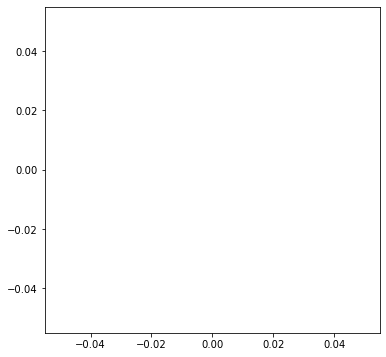

In [59]:
# While adding notes and fiddling with this a bit, this graph entirely broke
    # Not sure what caused that, but I created this as a sample graph for comparing datasets in terms of vocab
    
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

colors = {'0':'tab:blue', '1':'tab:orange'}

ax.scatter(seeds_df['Date'], seeds_df['% Soft Seeds'], c=seeds_df['Genre'].map(colors))

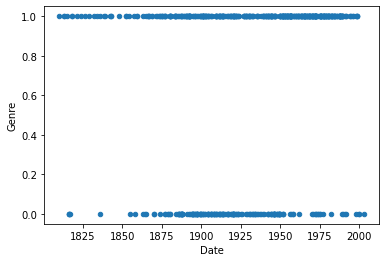

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

seeds_df.plot(kind = 'scatter', x = 'Date', y = 'Genre')

plt.show()
# Here is where I realized the flaws in the scifi data, and began to check the original dataset details
    # I realized, way back at the start, I had used the WRONG METADATA
    
# this was bad, as the data I used was unbalanced and sigificantly harder to work with

In [50]:
# DO THIS!!!
scifi_df_list0 = []
random_df_list0 = []

for index, row in seeds_df.iterrows():
    if row['Genre'] == 0:
        scifi_df_list0.append(row)
    if row['Genre'] == 1:
        random_df_list0.append(row)


scifi_seeds = pd.DataFrame(scifi_df_list0)
random_seeds = pd.DataFrame(random_df_list0)
random_seeds = random_seeds.reset_index(drop=True)

In [ ]:
# MAGICAL SAVING POINT!!!



In [ ]:
# All of this below were attempts to categorize the data I had, before I realized it was basically fruitless

In [ ]:
i =0
for index, row in final_df2.iterrows():
    if row['Date'] == 0:
        final_df2.iat[i, final_df2.columns.get_loc('Date')] = final_scifi_df.at[i,'firstpub']
    i = i + 1

In [ ]:
final_df2.loc[final_df['Date'] == 0]


In [ ]:
periods = [(1800, 1899), (1900, 1919), (1920, 1949), (1950, 1969), (1970, 1979), (1980, 1989), (1990, 1999), (2000, 2010)]


In [34]:
# Is there a way of automating this better? Almost certainly yes. Do I want to invest a lot of time into figuring it out? No
temp = final_df.copy()
temp['Date'] = temp['Date'].astype(str).astype(int)
temp['Genre'] = temp['Genre'].astype(str).astype(int)


    # jesus christ this looks terrible
scifi_0099 = []
scifi_0019 = []
scifi_2039 = []
scifi_4069 = []
scifi_7079 = []
scifi_8089 = []
scifi_9099 = []
scifi_0010 = []

random_0099 = []
random_0019 = []
random_2039 = []
random_4069 = []
random_7079 = []
random_8089 = []
random_9099 = []
random_0010 = []

scifi_df_list0 = []
random_df_list0 = []

for index, row in temp.iterrows():
    if row['Genre'] == 0:
        if 1800 <= row['Date'] <= 1899:
            scifi_0099.append(row)
        if 1900 <= row['Date'] <= 1919:
            scifi_0019.append(row)
        if 1920 <= row['Date'] <= 1939:
            scifi_2039.append(row)
        if 1940 <= row['Date'] <= 1969:
            scifi_4069.append(row)
        if 1970 <= row['Date'] <= 1979:
            scifi_7079.append(row)
        if 1980 <= row['Date'] <= 1989:
            scifi_8089.append(row)
        if 1990 <= row['Date'] <= 1999:
            scifi_9099.append(row)
        if 2000 <= row['Date'] <= 2010:
            scifi_0010.append(row)     
                          
    else:
        if 1800 <= row['Date'] <= 1899:
            random_0099.append(row)
        if 1900 <= row['Date'] <= 1919:
            random_0019.append(row)
        if 1920 <= row['Date'] <= 1939:
            random_2039.append(row)
        if 1940 <= row['Date'] <= 1969:
            random_4069.append(row)
        if 1970 <= row['Date'] <= 1979:
            random_7079.append(row)
        if 1980 <= row['Date'] <= 1989:
            random_8089.append(row)
        if 1990 <= row['Date'] <= 1999:
            random_9099.append(row)
        if 2000 <= row['Date'] <= 2010:
            random_0010.append(row)

scifi_0099_df = pd.DataFrame(scifi_0099)
scifi_0019_df = pd.DataFrame(scifi_0019)
scifi_2039_df = pd.DataFrame(scifi_2039)
scifi_4069_df = pd.DataFrame(scifi_4069)
scifi_7079_df = pd.DataFrame(scifi_7079)
scifi_8089_df = pd.DataFrame(scifi_8089)
scifi_9099_df = pd.DataFrame(scifi_9099)
scifi_0010_df = pd.DataFrame(scifi_0010)

random_0099_df = pd.DataFrame(random_0099)
random_0019_df = pd.DataFrame(random_0019)
random_2039_df = pd.DataFrame(random_2039)
random_4069_df = pd.DataFrame(random_4069)
random_7079_df = pd.DataFrame(random_7079)
random_8089_df = pd.DataFrame(random_8089)
random_9099_df = pd.DataFrame(random_9099)
random_0010_df = pd.DataFrame(random_0010)

scifi_0099_df = scifi_0099_df.reset_index(drop=True)
scifi_0019_df = scifi_0019_df.reset_index(drop=True)
scifi_2039_df = scifi_2039_df.reset_index(drop=True)
scifi_4069_df = scifi_4069_df.reset_index(drop=True)
scifi_7079_df = scifi_7079_df.reset_index(drop=True)
scifi_8089_df = scifi_8089_df.reset_index(drop=True)
scifi_9099_df = scifi_9099_df.reset_index(drop=True)
scifi_0010_df = scifi_0010_df.reset_index(drop=True)
random_0099_df = random_0099_df.reset_index(drop=True)
random_0019_df = random_0019_df.reset_index(drop=True)
random_2039_df = random_2039_df.reset_index(drop=True)
random_4069_df = random_4069_df.reset_index(drop=True)
random_7079_df = random_7079_df.reset_index(drop=True)
random_8089_df = random_8089_df.reset_index(drop=True)
random_9099_df = random_9099_df.reset_index(drop=True)
random_0010_df = random_0010_df.reset_index(drop=True)


In [45]:
scifi_0019_df

,Genre,Docid,Date,Title,a,aa,aaa,aaaah,aaah,aaanthor,...,zuyder,zvani,zvi,zwar,zweig,zwolle,zworykin,zyama,zygielbojm,zyklon
0,0,nyp.33433076024060,1900,The secret of the crater,890.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,uc1.$b386778,1904,"The food of the gods | $c: [by] H. G. Wells, o...",1067.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,coo.31924013568781,1900,Tales of space and time,786.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,dul1.ark+=13960=t9r21mf2d,1908,Lord of the world,1218.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,nyp.33433074954656,1902,Welsh rarebit tales,857.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,uc2.ark+=13960=t00z77h4n,1907,Beside still waters,977.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,mdp.39015008880844,1904,Master of the world. | $c: Edited by I.O. Evans.,675.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,nyp.33433076063431,1906,The doomsman,1423.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,dul1.ark+=13960=t1qf9cr59,1906,A time of terror,746.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,nyp.33433074850870,1904,The Princess Thora,782.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
type(seeds_df.at[20,'Date'])

numpy.float64

In [6]:
five = 5
if 1 <= five <= 6:
    print('f---')

f---


In [62]:
# Here I discovered the other, alternate, dataset, and opened it up
master_meta = pd.read_csv('C:\\Users\\kayde\\Desktop\\ENGL 343\\mastermetadata.csv')

In [69]:
master_meta.loc[master_meta['tags'] == 'sf_loc']

,docid,htid,tokens,tags,author,authordate,imprint,inferreddate,firstpub,enumcron,subjects,genres,title


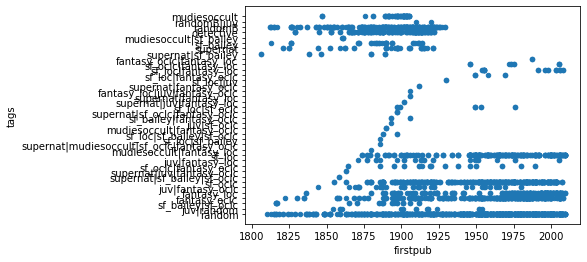

In [67]:
# Yeah... it was a lot better put together than mine

master_meta.plot(kind = 'scatter', x = 'firstpub', y = 'tags')

plt.show()

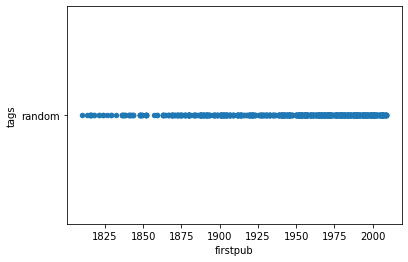

In [70]:
rip = []

for index, row in master_meta.iterrows():
    if row['tags'] == 'random':
        rip.append(row)
        
rip_df = pd.DataFrame(rip)

rip_df.plot(kind = 'scatter', x = 'firstpub', y = 'tags')

plt.show()

In [ ]:
rip_df.plot(kind = 'scatter', x = 'firstpub', y = 'tags')
plt.show()